In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TOP_SIGNATE/Deroito_competition/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TOP_SIGNATE/Deroito_competition/test.csv')

In [ ]:
df_train_y = df_train['attendance']
df_train_x = df_train.drop(['id', 'match_date', 'kick_off_time', 'attendance'], axis=1)
df_test_x = df_test.drop(['id', 'match_date', 'kick_off_time'], axis=1)
df_train_x['section_round'] = df_train_x['section'] + '_' + df_train_x['round'].astype(str)
df_test_x['section_round'] = df_test_x['section'] + '_' + df_test_x['round'].astype(str)
df_train_x = df_train_x.drop(['section', 'round'], axis=1)
df_test_x = df_test_x.drop(['section', 'round'], axis=1)

In [ ]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   home_team      3672 non-null   object 
 1   away_team      3672 non-null   object 
 2   venue          3672 non-null   object 
 3   weather        3672 non-null   object 
 4   temperature    3672 non-null   float64
 5   humidity       3672 non-null   int64  
 6   broadcasters   3672 non-null   object 
 7   section_round  3672 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 229.6+ KB


In [ ]:
df_train_x_obj = df_train_x.select_dtypes(include='object')
df_train_x_num = df_train_x.select_dtypes(exclude='object')
df_train_x_obj.head()

,home_team,away_team,venue,weather,broadcasters,section_round
0,G大阪,浦和,万博記念競技場,晴,NHK総合/J SPORTS(録),第1節_第1日
1,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,山梨放送/テレビ静岡(録)/J SPORTS(録),第1節_第2日
2,FC東京,大分,味の素スタジアム,晴,BS-i/MXテレビ(録)/J SPORTS(録),第1節_第2日
3,磐田,福岡,静岡スタジアムエコパ,晴,J SPORTS,第1節_第2日
4,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),第1節_第2日


In [ ]:
df_train_x_obj['section_round'].unique()

array(['第1節_第1日', '第1節_第2日', '第2節_第1日', '第2節_第2日', '第3節_第1日', '第4節_第1日',
       '第4節_第2日', '第5節_第1日', '第5節_第2日', '第6節_第1日', '第6節_第2日', '第7節_第1日',
       '第7節_第2日', '第8節_第1日', '第8節_第2日', '第9節_第1日', '第9節_第2日', '第10節_第1日',
       '第10節_第2日', '第11節_第1日', '第11節_第2日', '第12節_第1日', '第12節_第2日',
       '第13節_第1日', '第14節_第1日', '第14節_第2日', '第15節_第1日', '第16節_第1日',
       '第16節_第2日', '第17節_第1日', '第18節_第1日', '第18節_第2日', '第19節_第1日',
       '第20節_第1日', '第20節_第2日', '第21節_第1日', '第22節_第1日', '第22節_第2日',
       '第23節_第1日', '第23節_第2日', '第24節_第1日', '第24節_第2日', '第25節_第1日',
       '第25節_第2日', '第26節_第1日', '第26節_第2日', '第27節_第1日', '第27節_第2日',
       '第28節_第1日', '第28節_第2日', '第29節_第1日', '第29節_第2日', '第30節_第1日',
       '第31節_第1日', '第31節_第2日', '第32節_第1日', '第33節_第1日', '第34節_第1日',
       '第3節_第2日', '第13節_第2日', '第14節_第3日', '第15節_第2日', '第17節_第2日',
       '第19節_第2日', '第21節_第2日', '第30節_第2日', '第33節_第2日', '第6節_第3日',
       '第23節_第3日', '第25節_第3日', '第32節_第2日', '第4節_第3日', '第11節_第3日',
       '第18節_第3日', '第28節_第3日', '第3節_第3日', '第5節

In [ ]:
!pip install category_encoders
import category_encoders as ce
list_cols = df_train_x_obj.columns
encoder = ce.OrdinalEncoder(cols=list_cols)
df_train_x_obj_enc = encoder.fit_transform(df_train_x_obj)

In [ ]:
df_train_x_obj_enc.head()

,home_team,away_team,venue,weather,broadcasters,section_round
0,1,1,1,1,1,1
1,2,2,2,1,2,2
2,3,3,3,1,3,2
3,4,4,4,1,4,2
4,5,5,5,1,5,2


In [ ]:
df_train_x_coc = pd.concat([df_train_x_num, df_train_x_obj_enc], axis=1)
df_train_x_coc.head()

,temperature,humidity,home_team,away_team,venue,weather,broadcasters,section_round
0,8.3,40,1,1,1,1,1,1
1,12.9,28,2,2,2,1,2,2
2,12.1,35,3,3,3,1,3,2
3,11.6,42,4,4,4,1,4,2
4,13.1,32,5,5,5,1,5,2


In [ ]:
df_train_coc = pd.concat([df_train_x_coc, df_train_y], axis=1)
df_train_coc.head()

,temperature,humidity,home_team,away_team,venue,weather,broadcasters,section_round,attendance
0,8.3,40,1,1,1,1,1,1,20916
1,12.9,28,2,2,2,1,2,2,14277
2,12.1,35,3,3,3,1,3,2,22531
3,11.6,42,4,4,4,1,4,2,28564
4,13.1,32,5,5,5,1,5,2,17199


In [ ]:
df_train_coc.corr()['attendance']

temperature     -0.043279
humidity        -0.087887
home_team       -0.145626
away_team       -0.092505
venue           -0.299210
weather         -0.027965
broadcasters    -0.021617
section_round    0.024509
attendance       1.000000
Name: attendance, dtype: float64

In [ ]:
df_train_x_coc.head()

,temperature,humidity,home_team,away_team,venue,weather,broadcasters,section_round
0,8.3,40,1,1,1,1,1,1
1,12.9,28,2,2,2,1,2,2
2,12.1,35,3,3,3,1,3,2
3,11.6,42,4,4,4,1,4,2
4,13.1,32,5,5,5,1,5,2


<Axes: >

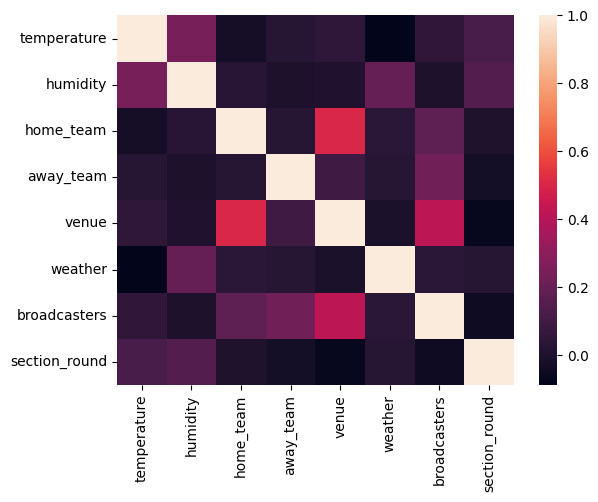

In [ ]:
import seaborn as sns
sns.heatmap(df_train_x_coc.corr())

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_train_x_coc)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

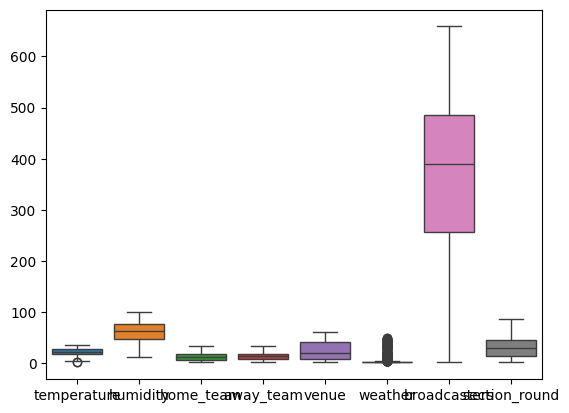

In [ ]:
sns.boxplot(data=df_train_x_coc)

<Axes: >

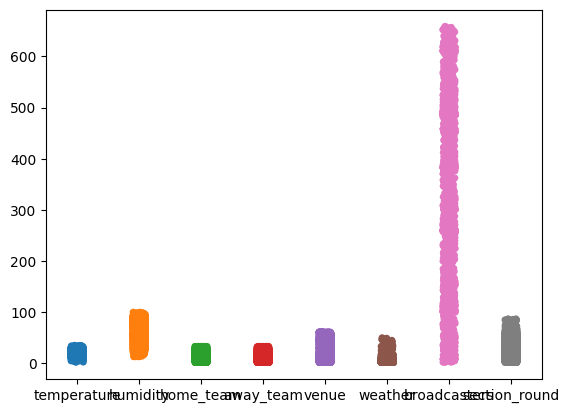

In [ ]:
sns.stripplot(data=df_train_x_coc)

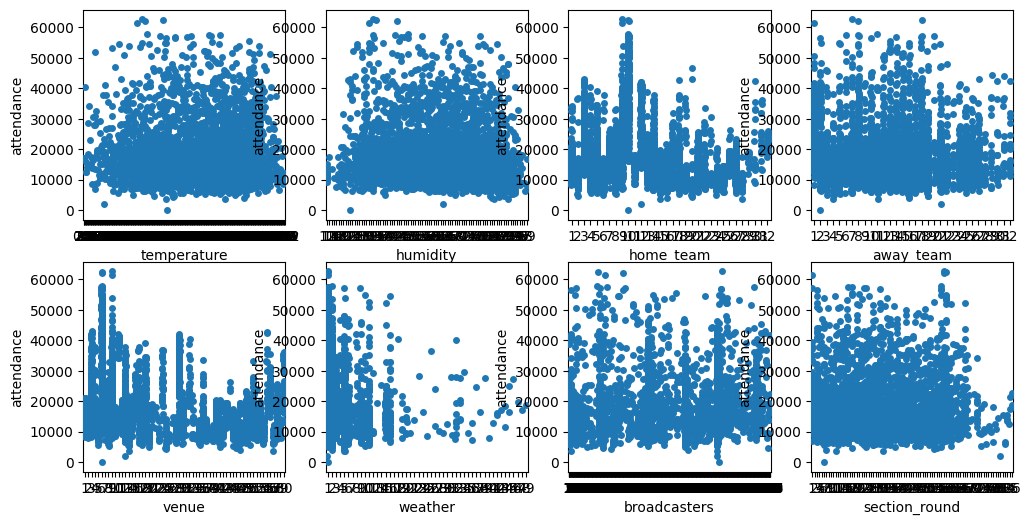

In [ ]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(df_train_x_coc.columns):
    plt.subplot(2, 4, i+1)
    sns.stripplot(x=col, y='attendance', data=df_train_coc)

<Axes: xlabel='humidity'>

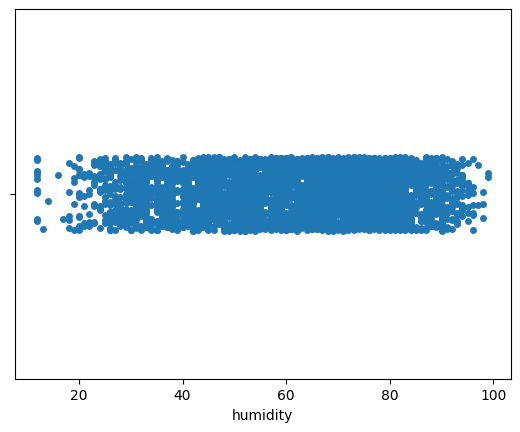

In [ ]:
sns.stripplot(x='humidity', data=df_train_x_coc)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(df_train_x_coc, df_train_y)

LinearRegression()

In [ ]:
df_test_x_obj = df_test_x.select_dtypes(include='object')
df_test_x_num = df_test_x.select_dtypes(exclude='object')
df_test_x_obj.head()

,home_team,away_team,venue,weather,broadcasters,section_round
0,鳥栖,神戸,ベストアメニティスタジアム,晴,DAZN,第1節_第1日
1,FC東京,浦和,味の素スタジアム,晴,DAZN/NHK BS1/TOKYO MX(録),第1節_第2日
2,広島,札幌,エディオンスタジアム広島,晴,DAZN/NHK広島/NHK札幌,第1節_第2日
3,Ｇ大阪,名古屋,パナソニック スタジアム 吹田,曇,DAZN,第1節_第2日
4,湘南,長崎,Shonan BMW スタジアム平塚,晴,DAZN,第1節_第2日


In [ ]:
df_test_x_obj_enc = encoder.transform(df_test_x_obj)

df_test_x_coc = pd.concat([df_test_x_num, df_test_x_obj_enc], axis=1)
df_test_x_coc.head()

,temperature,humidity,home_team,away_team,venue,weather,broadcasters,section_round
0,6.6,57,27.0,19.0,49.0,1.0,611.0,1.0
1,14.1,40,3.0,1.0,3.0,1.0,626.0,2.0
2,16.3,51,8.0,22.0,51.0,1.0,-1.0,2.0
3,12.9,42,31.0,13.0,-1.0,2.0,611.0,2.0
4,13.8,50,25.0,-1.0,-1.0,1.0,611.0,2.0


In [ ]:
model.predict(df_test_x_coc)

array([15334.140934  , 26316.00594925,  9462.40334401, 25850.50812907,
       27075.41892217, 17695.65381099, 16322.3113361 , 12808.12138714,
       14753.37673428, 23423.04664077, 16179.97426445, 26289.035616  ,
       18007.62557791, 23151.49455731, 19479.08731673, 15818.37816823,
       21986.76396281, 23424.24743401, 21933.48437351, 17112.91857664,
       12360.16719432, 21645.19642139, 22362.21457223, 23946.81439973,
       22572.49897396, 19658.16905479, 26427.95897483, 20509.70700894,
       14078.21821832, 23219.80761559, 24656.01541475, 23941.52637065,
       12226.06153244, 15110.78841868, 16485.08536343, 19291.04797967,
       25108.15025318, 19981.24758773, 14899.38092812, 21837.97151864,
       22331.18672583, 23547.59053634, 14757.70550336, 16361.0014983 ,
       20888.36832631, 18469.79974653, 21054.69897076, 14808.99338479,
       22405.5609427 , 25444.71841513, 25421.04416801, 25821.22082388,
       25565.29791057, 22401.09852022, 11948.19481229, 24452.81301717,
      

In [ ]:
submission = pd.DataFrame({'id': df_test['id'], 'attendance': model.predict(df_test_x_coc)})
submission.to_csv('Deroito_J_league_01.csv', index=False, header=False)


In [ ]:
submission = pd.DataFrame({'id': df_test['id'], 'attendance': model.predict(df_test_x_coc)})
submission.to_csv('Deroito_J_league_02.csv', index=False)
